In [6]:
import tensorflow as tf

sess = tf.Session()

In [7]:
a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

In [8]:
multiplication = tf.multiply(a, x_data)

In [9]:
loss = tf.square(tf.subtract(multiplication, 50.))

In [11]:
init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [12]:
print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    # トレーニングステップを実行
    sess.run(train_step, feed_dict={x_data: x_val})
    # aの値を取得
    a_val = sess.run(a)
    # 論理ゲートの出力を計算
    mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
7.0 * 5.0 = 35.0
8.5 * 5.0 = 42.5
9.25 * 5.0 = 46.25
9.625 * 5.0 = 48.125
9.8125 * 5.0 = 49.0625
9.90625 * 5.0 = 49.5312
9.95312 * 5.0 = 49.7656
9.97656 * 5.0 = 49.8828
9.98828 * 5.0 = 49.9414
9.99414 * 5.0 = 49.9707


In [15]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()

a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

# 入れ子の論理ゲートを追加
two_gate = tf.add(tf.multiply(a, x_data), b)

# 損失関数として出力と目的値 50 の間の距離を実装
loss = tf.square(tf.subtract(two_gate, 50.))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [16]:
print('\nOptimizing Two Gate Output to 50.')
for i in range(10):
    sess.run(train_step, feed_dict={x_data: x_val})
    a_val, b_val = (sess.run(a), sess.run(b))
    # 入れ子の論理ゲートの出力を計算
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
    print(str(a_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))


Optimizing Two Gate Output to 50.
5.4 * 5.0 + 1.88 = 28.88
7.512 * 5.0 + 2.3024 = 39.8624
8.52576 * 5.0 + 2.50515 = 45.134
9.01236 * 5.0 + 2.60247 = 47.6643
9.24593 * 5.0 + 2.64919 = 48.8789
9.35805 * 5.0 + 2.67161 = 49.4619
9.41186 * 5.0 + 2.68237 = 49.7417
9.43769 * 5.0 + 2.68754 = 49.876
9.45009 * 5.0 + 2.69002 = 49.9405
9.45605 * 5.0 + 2.69121 = 49.9714


In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

# 乱数シードを設定
tf.set_random_seed(5)
np.random.seed(42)

In [33]:
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [34]:
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [35]:
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

In [36]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

init = tf.global_variables_initializer()
sess.run(init)

In [54]:
print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(500):
    # バッチを選択するためのインデックスをランダムに選択
    rand_indices = np.random.choice(len(x), size=batch_size)
    # トレーニングセットの値を選択
    x_vals = np.transpose([x[rand_indices]])
    # トレーニングステップを実行
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))
    
    if i%50==0:
        print('sigmoid = ' + str(np.mean(activation_sigmoid)) + ' relu = ' + str(np.mean(activation_relu)))


Optimizing Sigmoid AND Relu Output to 0.75
sigmoid = 0.738884 relu = 0.742126
sigmoid = 0.739381 relu = 0.747705
sigmoid = 0.740333 relu = 0.748104
sigmoid = 0.741143 relu = 0.748104
sigmoid = 0.741851 relu = 0.748111
sigmoid = 0.742503 relu = 0.748057
sigmoid = 0.743074 relu = 0.748113
sigmoid = 0.743567 relu = 0.748178
sigmoid = 0.743998 relu = 0.748219
sigmoid = 0.744407 relu = 0.748186


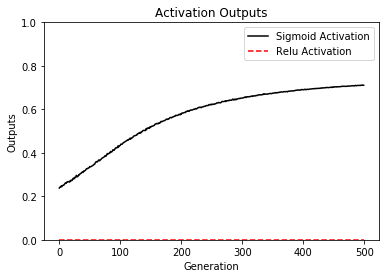

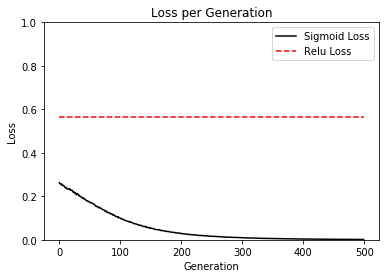

In [38]:
# 活性化関数の出力と損失関数の出力をプロットする。
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

# 損失関数の出力をプロット
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

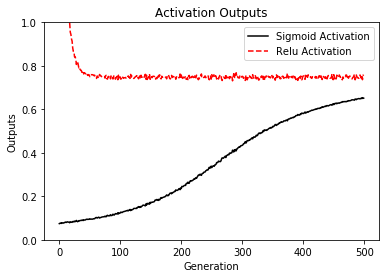

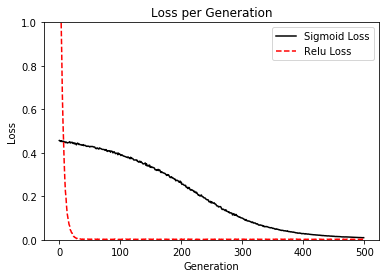

In [52]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.Session()

# 乱数シードを設定
tf.set_random_seed(5)
np.random.seed(42)

batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))

relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

init = tf.global_variables_initializer()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []
for i in range(500):
    # バッチを選択するためのインデックスをランダムに選択
    rand_indices = np.random.choice(len(x), size=batch_size)
    # トレーニングセットの値を選択
    x_vals = np.transpose([x[rand_indices]])
    # トレーニングステップを実行
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
    
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))

# 活性化関数の出力と損失関数の出力をプロットする。
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

# 損失関数の出力をプロット
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [56]:
iris = datasets.load_iris()
# iris.data = [(がく片の長さ, 花びらの長さ, 花びらの幅)]
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

sess = tf.Session()

In [57]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [58]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8),replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [59]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [60]:
batch_size = 50

x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [62]:
hidden_layer_nodes = 5
# 入力 → 隠れ層のノード
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
# 隠れ層のノードごとに1つのバイアス
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
# 隠れ層の入力 → 1つの出力
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
# 出力のバイアス
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [63]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [64]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [65]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [67]:
# まず、損失ベクトルの格納先を初期化
loss_vec = []
test_loss = []
for i in range(500):
    # バッチをい選択するためのインデックスをランダムに選択
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # トレーニングセットの値を選択
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # トレーニングステップを実行
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    # トレーニングセットの損失値を保存
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    # テストセットの損失値を保存
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt([test_temp_loss]))
    
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 0.438775
Generation: 100. Loss = 0.493612
Generation: 150. Loss = 0.529575
Generation: 200. Loss = 0.410917
Generation: 250. Loss = 0.446842
Generation: 300. Loss = 0.332491
Generation: 350. Loss = 0.296074
Generation: 400. Loss = 0.229142
Generation: 450. Loss = 0.23694
Generation: 500. Loss = 0.162088


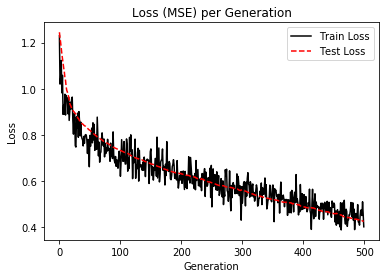

In [68]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Generation: 50. Loss = 1.61837
Generation: 100. Loss = 0.370534
Generation: 150. Loss = 0.18638
Generation: 200. Loss = 0.127182
Generation: 250. Loss = 0.0944887
Generation: 300. Loss = 0.0691249
Generation: 350. Loss = 0.0558073
Generation: 400. Loss = 0.0496253
Generation: 450. Loss = 0.0733033
Generation: 500. Loss = 0.0602367


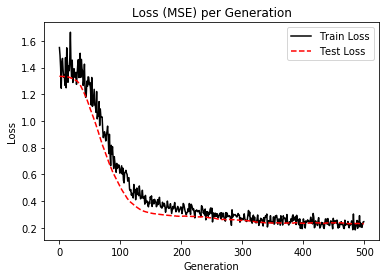

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

iris = datasets.load_iris()
# iris.data = [(がく片の長さ, 花びらの長さ, 花びらの幅)]
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

sess = tf.Session()
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8),replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))
batch_size = 50

x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
hidden_layer_nodes = 5
# 入力 → 隠れ層のノード
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes]))
# 隠れ層のノードごとに1つのバイアス
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
# 隠れ層の入力 → 1つの出力
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
# 出力のバイアス
b2 = tf.Variable(tf.random_normal(shape=[1]))
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))
loss = tf.reduce_mean(tf.square(y_target - final_output))
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)
# まず、損失ベクトルの格納先を初期化
loss_vec = []
test_loss = []
for i in range(500):
    # バッチをい選択するためのインデックスをランダムに選択
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # トレーニングセットの値を選択
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    # トレーニングステップを実行
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    # トレーニングセットの損失値を保存
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    # テストセットの損失値を保存
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt([test_temp_loss]))
    
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()